

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this is project I will choose TMDb movie data which is contains information about 10,000 movies collected from the Movie Database (TMDb), including user ratings , revenue , relase date , vote count , vote average , geners ....etc 
The number of sample in this datset is 10866 and the number of columns is 21.
There are couples of questions I will try to cover it in this roject  :

1- we need to know which movie has high popularity year after year?
2- which movie has high/low budget?
3- which movie has high/low profit?
4- which movie has long/short duration time?
5- I need to know in which year we have highest profit ?
6- which movie has highest/lowest revenue ?
7- which director achieve high movie profit that directed the top movie ?

In [75]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

Before cleaning , I need to check the dimension and display concise summary of dataframe .

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
dt = pd.read_csv('tmdb-movies.csv')
dt.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# To know dimension of this dataset
dt.shape

(10866, 21)

In [4]:
# To display concise summary of dataframe , display non -null values
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# to display number of unique values in each columns
dt.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
#Check the total number of duplicated rows
dt.duplicated().sum()

1

In [7]:
#Check null values ( missing values)
dt.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# To check datatype for each column
dt.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


### Data Cleaning (Replace this with more specific notes!)

As we can see from above , we got five rows , we need to work on column that contain "|" , because if we will retrieve this column it will consider only the data in the first position which preceding | , the comulmns that need to be modified: "Production_Companies" , "Cast " ,"Keywords" and "Genres".
In addtion to all that , i need to put in my consideration the currency of budget and revenue( dollar) .
The steps of cleaning as below depending on my observation:

From above we found that we have found duplicate values that need to be removed and null values that need to be cleaned (  genres, cast,director, tagline ) , but first I will remove the columns that I guess i will not use like :'id', 'imdb_id','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies'
Also, i found 0 rows in both ( revenue & budget ) column , also i need t make sure the date is date type not string .
First : Remove unneceassary columns
Second : Drop duplicate row
Third : Drop null values (missing values)
Fourth : Change the type of release_date from string to datetime
Fifth : I already observed that revenue and budget column contains row with zero value , i need to remove 0s
Sixth : Remove Zero from runtime column
Seventh : I assumed the currency of revenue and budget in dollar 

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Step one : Remove unused Columns :
dropped_Column = ['id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies']
dt.drop(dropped_Column , axis=1, inplace=True)
dt.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015


In [10]:
# Second Step : Drop duplicate row
dt.drop_duplicates(inplace=True)

In [11]:
# verify the number of duplicated row
dt.duplicated().sum()

0

In [12]:
# Third Step : Drop null values (missing values)
dt.dropna(inplace=True)

In [15]:
# Verify drop null values
dt.isnull().sum().any()

False

In [16]:
#Fourth Step : Change the type of release_date from string to datetime
dt['release_date'] = pd.to_datetime(dt['release_date'])

In [17]:
# verify the date for release date
dt.dtypes

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [18]:
# Remove zeros from revenue and budget columns
# First we need to change zero with null values
dt['revenue'] = dt['revenue'].replace(0, np.NAN)
dt['budget'] = dt['budget'].replace(0, np.NAN)

In [19]:
#Verify Revenue and budget columns
dt.head(40)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


In [20]:
# Removing rows whih have NAN values
deleted_NAN = ['budget', 'revenue']
dt.dropna(subset = deleted_NAN, inplace = True )

In [22]:
# Verify removing rows whih have NAN values
dt.head(400)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


In [23]:
# Replace zero with NAN in runtime column
dt['runtime'] =dt['runtime'].replace(0, np.NAN)

In [24]:
# Verify Replace zero with NAN in runtime column
dt.head(40)

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


In [25]:
# seventh Step :change the column name of reveue and budget to incicate that both are dollars currency
dt.rename(columns = {'revenue' : 'revenue_(Dollars)','budget' : 'budget_(Dollars)'}, inplace = True)

In [26]:
# Verify Replace zero with NAN in runtime column
dt.head(400)

,popularity,budget_(Dollars),revenue_(Dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",156,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,125,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,141,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",91,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,94,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


<a id='eda'></a>
## Exploratory Data Analysis

In this part , i will answered the questions raised in introduction section.

### we need to know which movie has high popularity year after year?

I tried to calculate the mean and the median of populrirty among different yaers , and i plotted the line chart to see the difference of popularity from 1960 till 2015.

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
popularity_mean = dt.groupby('release_year')['popularity'].mean()
popularity_mean


release_year
1960    1.641686
1961    0.855938
1962    0.983485
1963    1.040612
1964    1.377790
1965    1.282088
1966    0.395168
1967    1.097490
1968    0.913463
1969    1.152940
1970    0.626106
1971    0.983619
1972    1.483732
1973    1.052033
1974    0.853721
1975    1.441755
1976    0.942370
1977    1.267286
1978    0.802433
1979    1.240415
1980    1.019887
1981    0.777040
1982    1.047843
1983    0.824461
1984    0.962193
1985    0.970216
1986    0.716427
1987    0.876013
1988    0.703736
1989    1.058427
1990    0.857328
1991    0.830856
1992    0.894586
1993    0.811900
1994    1.249005
1995    1.075790
1996    0.939320
1997    1.039010
1998    0.963060
1999    1.018965
2000    0.873409
2001    1.097086
2002    1.130162
2003    1.277134
2004    1.169958
2005    1.054612
2006    1.019661
2007    1.031390
2008    1.183675
2009    1.189715
2010    1.219089
2011    1.243260
2012    1.484671
2013    1.426791
2014    2.700664
2015    2.970925
Name: popularity, dtype: float64

In [28]:
popularity_median = dt.groupby('release_year')['popularity'].median()
popularity_median

release_year
1960    1.504538
1961    0.538364
1962    0.526108
1963    0.862313
1964    0.812194
1965    1.297865
1966    0.395668
1967    0.678719
1968    0.633129
1969    1.108561
1970    0.429246
1971    0.627942
1972    0.740461
1973    0.876503
1974    0.520570
1975    1.214758
1976    0.786174
1977    0.495480
1978    0.512719
1979    0.883858
1980    0.650736
1981    0.469885
1982    0.786388
1983    0.504773
1984    0.605190
1985    0.697098
1986    0.574585
1987    0.689837
1988    0.498443
1989    0.720081
1990    0.517083
1991    0.641852
1992    0.677538
1993    0.743469
1994    0.771786
1995    0.875995
1996    0.793626
1997    0.811131
1998    0.878645
1999    0.716336
2000    0.734913
2001    0.663577
2002    0.880807
2003    0.875703
2004    0.910344
2005    0.775677
2006    0.775817
2007    0.827695
2008    0.866771
2009    0.826039
2010    0.918864
2011    0.929466
2012    1.061976
2013    1.070530
2014    1.805954
2015    2.038269
Name: popularity, dtype: float64

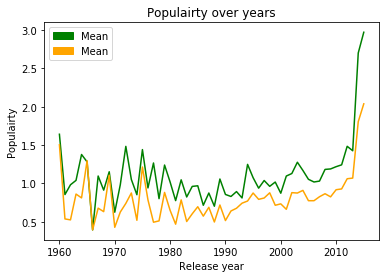

In [31]:
# draw a line chart to see the difference
plt.plot(popularity_mean , color='g')
plt.plot(popularity_median , color='orange')
plt.xlabel('Release year')
plt.ylabel('Populairty')
plt.title('Populairty over years')
green_patch = mpatches.Patch(color='green', label='Mean')
orange_patch = mpatches.Patch(color='orange', label='Mean')
plt.legend(handles=[green_patch , orange_patch ])
plt.show()

From above graph (popularity over years) ,  I computed the average of popularity in ech year , and plot the lne chart to 
show the trend , we can see that the trend of popularity mean is upward year to year until it reaches the peak point which is
in 2015. Moreover , I computed the median to analyze and improve that popularity which has no upper bound, in case the mean affected by higher rating , as shown from the graph the trend of populairty median is slightly smoother in recent years.
On general , the popularity over years is going up.

###  which movie has high/low budget?

In [32]:
# First thing to do it here is to calculate the profit of each movie by subtracting revenue from budget
dt.insert(1, 'profit_(Dollars)', dt['revenue_(Dollars)'] - dt['budget_(Dollars)'])

In [33]:
# Verify inserting the column
dt.head(2)

,popularity,profit_(Dollars),budget_(Dollars),revenue_(Dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


In [34]:
# let's check the data ype of inserted column
dt.dtypes

popularity                  float64
profit_(Dollars)            float64
budget_(Dollars)            float64
revenue_(Dollars)           float64
original_title               object
cast                         object
director                     object
tagline                      object
runtime                       int64
genres                       object
release_date         datetime64[ns]
vote_count                    int64
vote_average                float64
release_year                  int64
dtype: object

In [35]:
# Let's calculate the highest movie budget
high_id = dt['budget_(Dollars)'].idxmax()
#store the information inside variable details
high_details = pd.DataFrame(dt.loc[high_id])
high_details

,2244
popularity,0.25054
profit_(Dollars),-4.13912e+08
budget_(Dollars),4.25e+08
revenue_(Dollars),1.10876e+07
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller


In [36]:
# Let's calculate the lowest movie budget
low_id = dt['budget_(Dollars)'].idxmin()
#store the information inside variable details
lowest_details = pd.DataFrame(dt.loc[low_id])
lowest_details

,2618
popularity,0.090186
profit_(Dollars),99
budget_(Dollars),1
revenue_(Dollars),100
original_title,Lost & Found
cast,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Jeff Pollack
tagline,A comedy about a guy who would do anything to ...
runtime,95
genres,Comedy|Romance


###  which movie has high/low Profit?

In [45]:
# let's calculate the movie which has high profit ?
high_id = dt['profit_(Dollars)'].idxmax()
#store the information inside variable details
high_details = pd.DataFrame(dt.loc[high_id])
high_details

,1386
popularity,9.43277
profit_(Dollars),2.54451e+09
budget_(Dollars),2.37e+08
revenue_(Dollars),2.78151e+09
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction


In [46]:
# Let's calculate the lowest movie profit
low_id = dt['profit_(Dollars)'].idxmin()
#store the information inside variable details
lowest_details = pd.DataFrame(dt.loc[low_id])
lowest_details

,2244
popularity,0.25054
profit_(Dollars),-4.13912e+08
budget_(Dollars),4.25e+08
revenue_(Dollars),1.10876e+07
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
tagline,Assassin. Hero. Legend.
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller


### which movie has long/short duration time?

In [47]:
# let's calculate the movie which has high runtime 
high_id = dt['runtime'].idxmax()
#store the information inside variable details
high_details = pd.DataFrame(dt.loc[high_id])
high_details

,2107
popularity,0.534192
profit_(Dollars),-1.71287e+07
budget_(Dollars),1.8e+07
revenue_(Dollars),871279
original_title,Carlos
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director,Olivier Assayas
tagline,The man who hijacked the world
runtime,338
genres,Crime|Drama|Thriller|History


In [48]:
# Let's calculate the lowest movie runtime
low_id = dt['runtime'].idxmin()
#store the information inside variable details
lowest_details = pd.DataFrame(dt.loc[low_id])
lowest_details

,8005
popularity,0.592219
profit_(Dollars),1.8e+07
budget_(Dollars),3e+06
revenue_(Dollars),2.1e+07
original_title,Mickey's Christmas Carol
cast,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Burny Mattinson
tagline,He's back! Mickey Mouse - in his first new mot...
runtime,26
genres,Family|Animation


In [49]:
# I will calculate the average of runtime for all movies
dt['runtime'].mean()

109.12290033594626

In [72]:
# let's see the genral descriptive statistics
dt['runtime'].describe()

count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

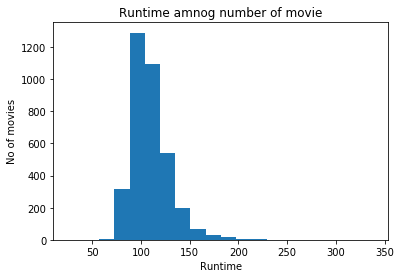

In [62]:
# let's draw runtime amnog number of movie 
plt.xlabel('Runtime')
plt.ylabel('No of movies')
plt.title('Runtime amnog number of movie')
plt.hist(dt['runtime'] , bins=20)
plt.figure(figsize=(9,6), dpi = 100)
#showing the histogram
plt.show()

From above graph (runtime among number of movies) , we can show that the highest runtime which has high number of movies( the peak point reach up to 1200 movies) is between 90 - 110 minutes

C:\Users\Samyah\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


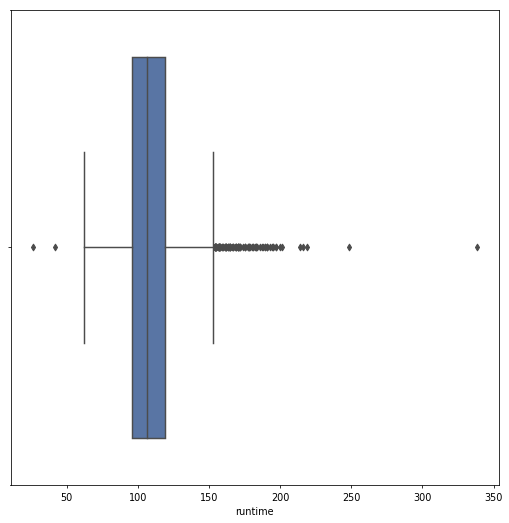

In [82]:
# let's plot box plot runtimes for movies
plt.figure(figsize=(9,9), dpi = 70)
#plotting box plot
sns.boxplot(dt['runtime'], palette="deep")
#showing the plot
plt.show()

From above box-plot , we can see how the disrtibution of runtime for all movies. we already got all what we need from described function (min, max, IQR )

### Which year has the most profit ?

In [64]:
year_profit = dt.groupby('release_year')['profit_(Dollars)'].sum()
year_profit

release_year
1960    1.040981e+08
1961    3.007832e+08
1962    1.668798e+08
1963    1.154119e+08
1964    2.946784e+08
1965    4.072819e+08
1966    5.246869e+07
1967    5.928346e+08
1968    1.682718e+08
1969    2.068630e+08
1970    3.200870e+08
1971    3.362847e+08
1972    3.857399e+08
1973    1.030886e+09
1974    6.265820e+08
1975    7.713739e+08
1976    4.744265e+08
1977    1.743308e+09
1978    1.002870e+09
1979    9.503302e+08
1980    1.001677e+09
1981    1.266779e+09
1982    1.793720e+09
1983    1.486674e+09
1984    1.850059e+09
1985    1.674173e+09
1986    1.659344e+09
1987    2.103204e+09
1988    2.314925e+09
1989    3.633579e+09
1990    3.445897e+09
1991    3.048992e+09
1992    3.858876e+09
1993    4.390321e+09
1994    4.720148e+09
1995    5.632435e+09
1996    4.797068e+09
1997    6.351835e+09
1998    5.173893e+09
1999    6.387122e+09
2000    6.103265e+09
2001    8.023653e+09
2002    9.094566e+09
2003    9.262534e+09
2004    9.847339e+09
2005    9.224778e+09
2006    8.595532e+09


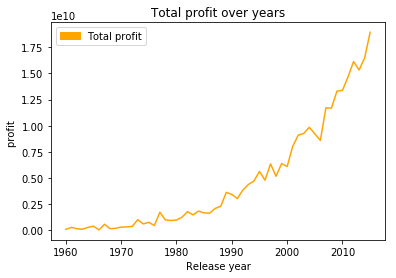

In [68]:
# plot the line chart of total profit among years
plt.plot(year_profit , color='orange')
plt.xlabel('Release year')
plt.ylabel('profit ')
plt.title('Total profit over years')
orange_patch = mpatches.Patch(color='orange', label='Total profit')
plt.legend(handles=[orange_patch ])
# Show the plt line chart
plt.show()

From above graph (Total profit over years) , we can understand that the prfit incearse year by year until reach 18M in 2015.
The graph does not show in every year how many movies released , but we can understand that the profit increase due to high number of movie have been relaesed in that year. 

### which movie has highest/lowest revenue ?

In [70]:
# let's calculate the movie which has high revenue
high_id = dt['revenue_(Dollars)'].idxmax()
#store the information inside variable details
high_details = pd.DataFrame(dt.loc[high_id])
high_details

,1386
popularity,9.43277
profit_(Dollars),2.54451e+09
budget_(Dollars),2.37e+08
revenue_(Dollars),2.78151e+09
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
tagline,Enter the World of Pandora.
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction


In [71]:
# Let's calculate the lowest movie profit
low_id = dt['revenue_(Dollars)'].idxmin()
#store the information inside variable details
lowest_details = pd.DataFrame(dt.loc[low_id])
lowest_details

,8142
popularity,0.552091
profit_(Dollars),-6e+06
budget_(Dollars),6e+06
revenue_(Dollars),2
original_title,Mallrats
cast,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,Kevin Smith
tagline,They're not there to shop. They're not there t...
runtime,94
genres,Romance|Comedy


### which director achieve high movie profit that directed the top movie ?

In [92]:
# I will extract the movie whose profit above 20M
movie_profit = dt[dt['profit_(Dollars)'] > 20000000]
movie_profit.head(3)

,popularity,profit_(Dollars),budget_(Dollars),revenue_(Dollars),original_title,cast,director,tagline,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


In [93]:
data = movie_profit['director'].str.cat(sep = '|')
#giving pandas series and storing the values separately
data = pd.Series(data.split('|'))
#this will us value in descending order
count = data.value_counts(ascending = False)
# let' show the top 8 director
count.head(8)

Steven Spielberg    24
Clint Eastwood      17
Tim Burton          15
Robert Zemeckis     13
Ridley Scott        13
Ron Howard          12
Michael Bay         11
Tony Scott          11
dtype: int64

Steven Spielberg directed the top film , and more likely to make high profit compred to other director

<a id='conclusions'></a>
## Conclusions

After exploring and answering my questions , i want to recap all my findings as below :

1- The movie popularity is growing up from 1960 on average year by year till it reach the highest point in 2015 , as the profit increase year by year until it reach the top point in 2015 , we can understand that the trend of populairty and revenue is upward .
2- From calculating the spread of runtime , we can understand that , we are expecting more movies after third quartile (Q3 = 119) than the first quarter( Q1 =95) , and the mean of runtime will pull toward rising .
3- As we saw from computing the top movie profit directed by these directors is more likely to make high profits
4- In general , the run time of all movie will be around 109.12 minutes

Limitation :

Overall , we do not know how many movies the directors directed in total, also we don't know in every year how many movies released , we can not make sure that movies directed by this dataset will always earn much profit . Also, if we want to attract people towards watching movie , we need to put into our consideration many characteristics  other than runtime , release date and actor . There are many factors influence the general charateristics such as movie  people personality and age , if they are children, teenager , adult or senior , people expectation towards the movie itself , all these characeristics will definietly affect the profit of movie .
